In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import warnings
import plotly.graph_objs as go
import matplotlib.pyplot as plt
import plotly.express as px
import altair as alt
alt.renderers.enable('kaggle')
warnings.simplefilter("ignore")

In [3]:
# Read Dataset
data = pd.read_csv("/kaggle/input/spotifyclassification/data.csv")

In [4]:
# Fix Unnamed column's name
data = data.drop("Unnamed: 0", axis="columns")
# Print the Start of the Dataset to examine the datas
data.head()

,acousticness,danceability,duration_ms,energy,instrumentalness,key,liveness,loudness,mode,speechiness,tempo,time_signature,valence,target,song_title,artist
0,0.0102,0.833,204600,0.434,0.021900,2,0.1650,-8.795,1,0.4310,150.062,4.0,0.286,1,Mask Off,Future
1,0.1990,0.743,326933,0.359,0.006110,1,0.1370,-10.401,1,0.0794,160.083,4.0,0.588,1,Redbone,Childish Gambino
2,0.0344,0.838,185707,0.412,0.000234,2,0.1590,-7.148,1,0.2890,75.044,4.0,0.173,1,Xanny Family,Future
3,0.6040,0.494,199413,0.338,0.510000,5,0.0922,-15.236,1,0.0261,86.468,4.0,0.230,1,Master Of None,Beach House
4,0.1800,0.678,392893,0.561,0.512000,5,0.4390,-11.648,0,0.0694,174.004,4.0,0.904,1,Parallel Lines,Junior Boys


In [5]:
# Looking for missing values in the dataset
data.isna().sum()

acousticness        0
danceability        0
duration_ms         0
energy              0
instrumentalness    0
key                 0
liveness            0
loudness            0
mode                0
speechiness         0
tempo               0
time_signature      0
valence             0
target              0
song_title          0
artist              0
dtype: int64

In [6]:
# Print the type of every attribute of the Dataset
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2017 entries, 0 to 2016
Data columns (total 16 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   acousticness      2017 non-null   float64
 1   danceability      2017 non-null   float64
 2   duration_ms       2017 non-null   int64  
 3   energy            2017 non-null   float64
 4   instrumentalness  2017 non-null   float64
 5   key               2017 non-null   int64  
 6   liveness          2017 non-null   float64
 7   loudness          2017 non-null   float64
 8   mode              2017 non-null   int64  
 9   speechiness       2017 non-null   float64
 10  tempo             2017 non-null   float64
 11  time_signature    2017 non-null   float64
 12  valence           2017 non-null   float64
 13  target            2017 non-null   int64  
 14  song_title        2017 non-null   object 
 15  artist            2017 non-null   object 
dtypes: float64(10), int64(4), object(2)
memory

In [7]:
data.describe()

,acousticness,danceability,duration_ms,energy,instrumentalness,key,liveness,loudness,mode,speechiness,tempo,time_signature,valence,target
count,2017.000000,2017.000000,2.017000e+03,2017.000000,2017.000000,2017.000000,2017.000000,2017.000000,2017.000000,2017.000000,2017.000000,2017.000000,2017.000000,2017.000000
mean,0.187590,0.618422,2.463062e+05,0.681577,0.133286,5.342588,0.190844,-7.085624,0.612295,0.092664,121.603272,3.968270,0.496815,0.505702
std,0.259989,0.161029,8.198181e+04,0.210273,0.273162,3.648240,0.155453,3.761684,0.487347,0.089931,26.685604,0.255853,0.247195,0.500091
min,0.000003,0.122000,1.604200e+04,0.014800,0.000000,0.000000,0.018800,-33.097000,0.000000,0.023100,47.859000,1.000000,0.034800,0.000000
25%,0.009630,0.514000,2.000150e+05,0.563000,0.000000,2.000000,0.092300,-8.394000,0.000000,0.037500,100.189000,4.000000,0.295000,0.000000
50%,0.063300,0.631000,2.292610e+05,0.715000,0.000076,6.000000,0.127000,-6.248000,1.000000,0.054900,121.427000,4.000000,0.492000,1.000000
75%,0.265000,0.738000,2.703330e+05,0.846000,0.054000,9.000000,0.247000,-4.746000,1.000000,0.108000,137.849000,4.000000,0.691000,1.000000
max,0.995000,0.984000,1.004627e+06,0.998000,0.976000,11.000000,0.969000,-0.307000,1.000000,0.816000,219.331000,5.000000,0.992000,1.000000


In [8]:
# Print the size of the Dataset 
data.shape

(2017, 16)

In [9]:
data.target.value_counts()

1    1020
0     997
Name: target, dtype: int64

In [10]:
labels = ["Liked Songs","Not Liked Songs"]
values = data['target'].value_counts().tolist()

px.pie(data, values=values, names=labels, title="Liked-Unliked Songs", 
       color_discrete_sequence=["#7CEA46", "#043927"])

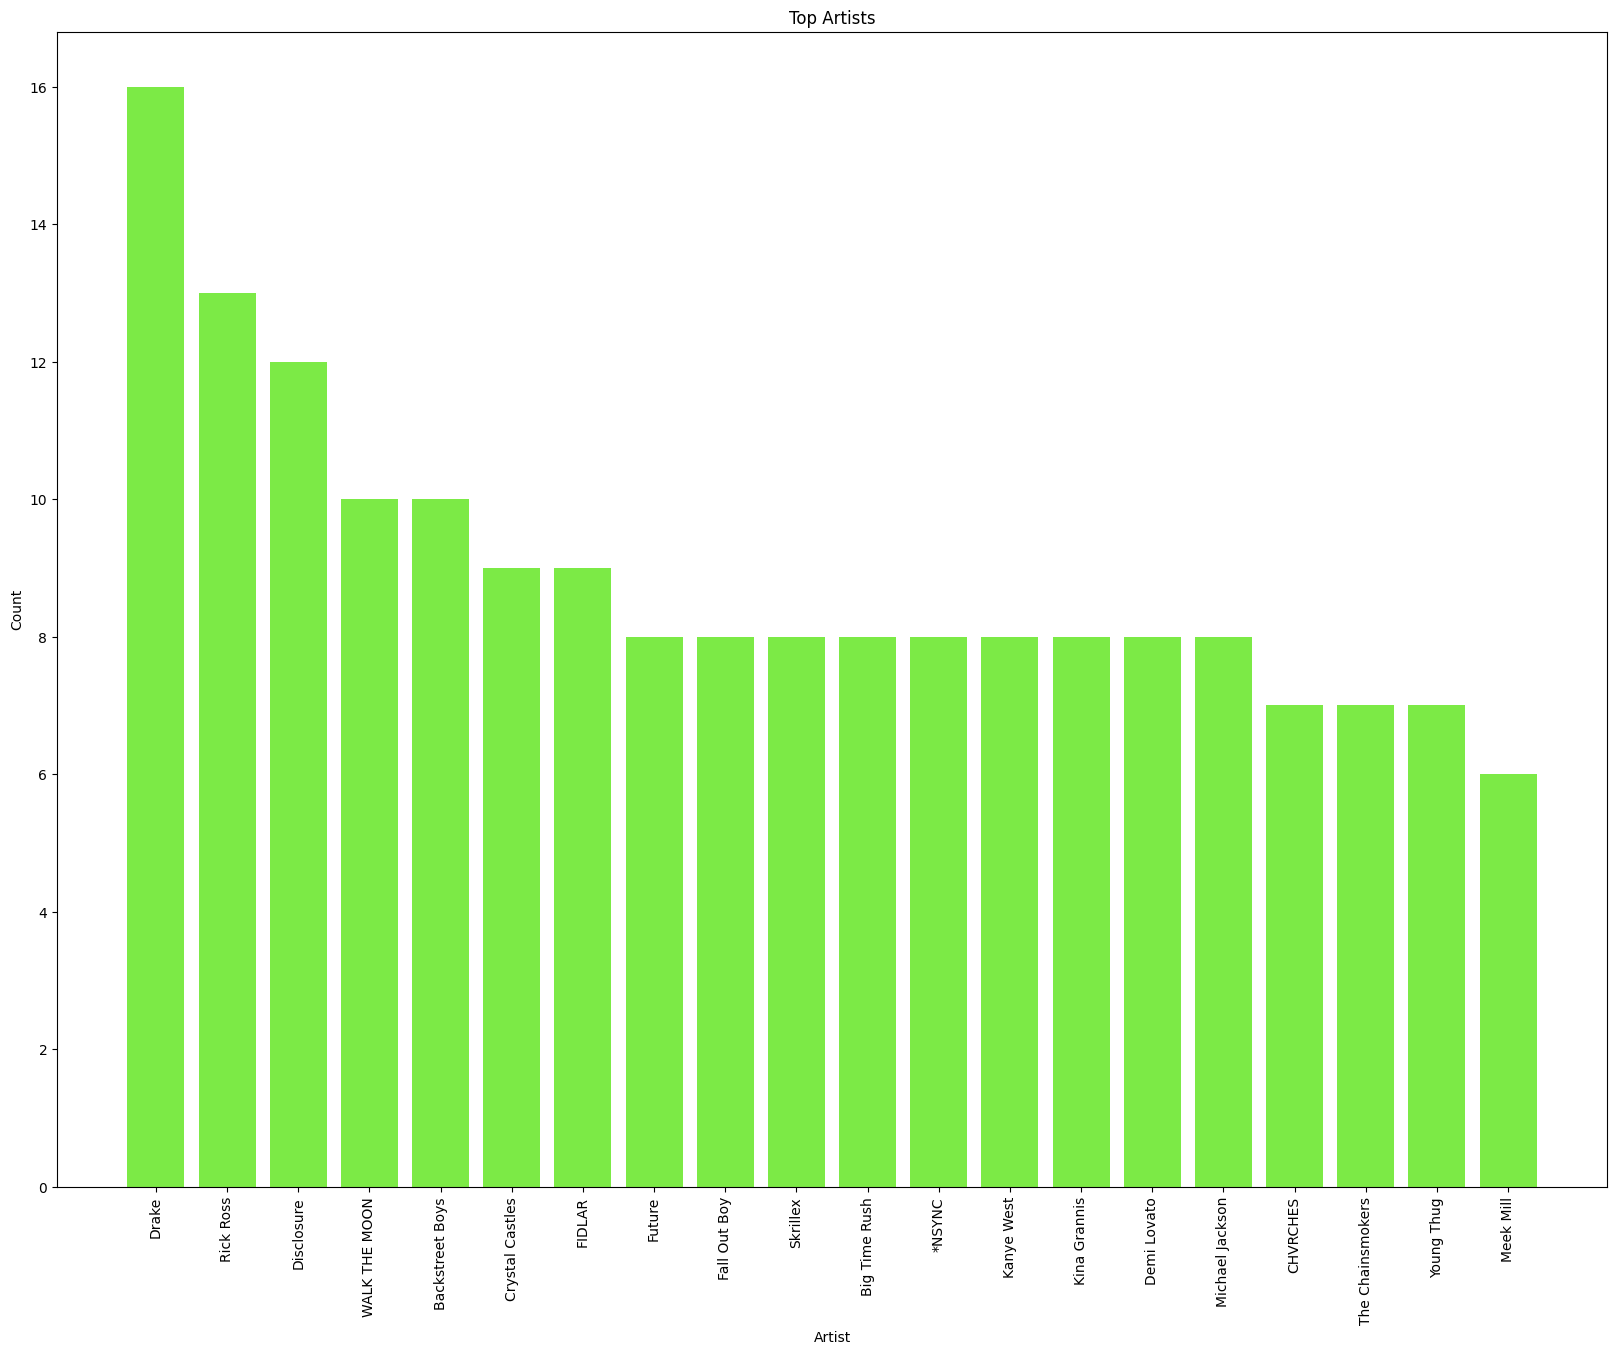

In [11]:
# Set the title and axis labels
values = data['artist'].value_counts().tolist()[:20]
names = list(dict(data['artist'].value_counts()).keys())[:20]

# Create the bar plot
fig, ax = plt.subplots(figsize=(20, 15))
ax.bar(names, values, color="#7CEA46")

# Set the title and axis labels
ax.set_title("Top Artists")
ax.set_xlabel("Artist")
ax.set_ylabel("Count")

# Display the plot
plt.xticks(rotation=90)
plt.show()

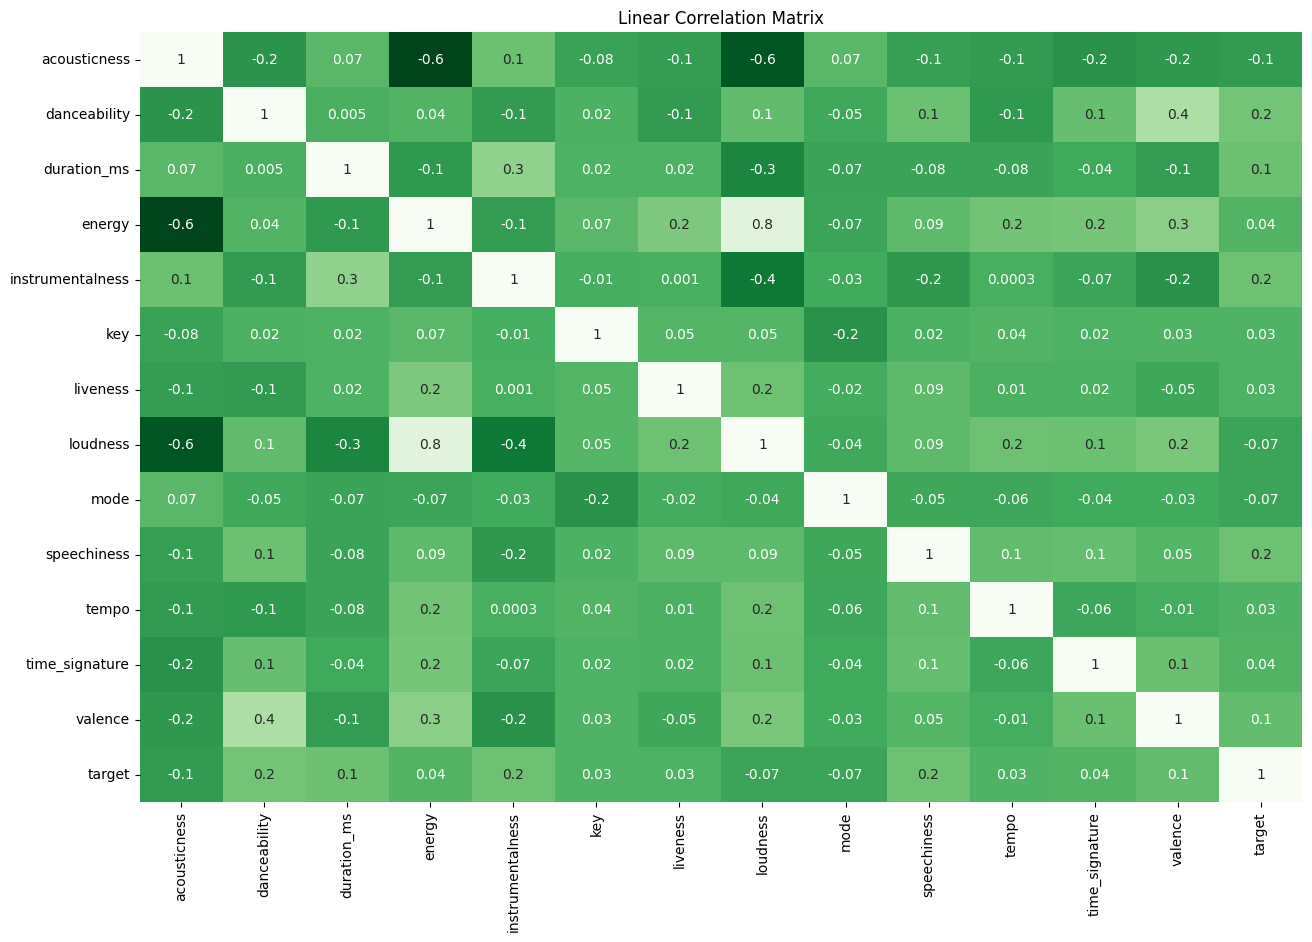

In [12]:
# Plot linear correlation matrix
numeric_data = data.drop(['song_title', 'artist'], axis=1)
fig, ax = plt.subplots(figsize=(15, 10))
sns.heatmap(numeric_data.corr(), annot=True, fmt='.1g', cmap="Greens_r", cbar=False)
plt.title('Linear Correlation Matrix')
plt.show()

In [13]:
numeric_features = data.select_dtypes(include=[np.number])

numeric_features.columns

Index(['acousticness', 'danceability', 'duration_ms', 'energy',
       'instrumentalness', 'key', 'liveness', 'loudness', 'mode',
       'speechiness', 'tempo', 'time_signature', 'valence', 'target'],
      dtype='object')

In [14]:
categorical_features = data.select_dtypes(include=[np.object])

categorical_features.columns

Index(['song_title', 'artist'], dtype='object')

In [15]:
correlation = numeric_features.corr()
print(correlation['target'].sort_values(ascending = False),'\n')

target              1.000000
danceability        0.176706
speechiness         0.154006
instrumentalness    0.152594
duration_ms         0.146749
valence             0.107930
time_signature      0.040182
energy              0.039688
tempo               0.034732
key                 0.033594
liveness            0.026364
loudness           -0.072000
mode               -0.072336
acousticness       -0.129627
Name: target, dtype: float64 



In [16]:
corr_df = data.corr('spearman').stack().reset_index(name='corr')
corr_df.loc[corr_df['corr'] == 1, 'corr'] = 0  # Remove diagonal
corr_df['abs'] = corr_df['corr'].abs()
alt.Chart(corr_df).mark_circle().encode(
    x='level_0',
    y='level_1',
    size='abs',
    color=alt.Color('corr', scale=alt.Scale(scheme='blueorange', domain=(-1, 1))))

alt.Chart(...)

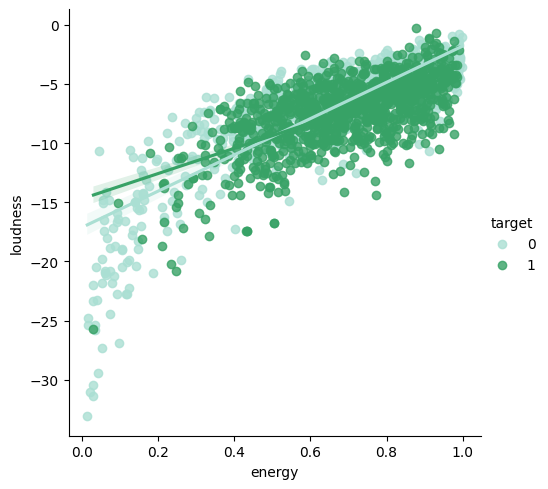

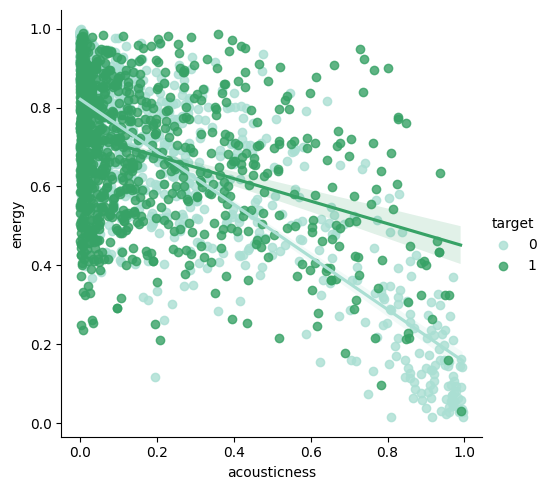

In [17]:
# Scatter chart for "loudness" and "energy"
sns.lmplot(y='loudness', x='energy', data=data, hue='target', palette='BuGn')

# Scatter chart for "acousticness" and "energy"
sns.lmplot(y='energy', x='acousticness', data=data, hue='target', palette='BuGn')

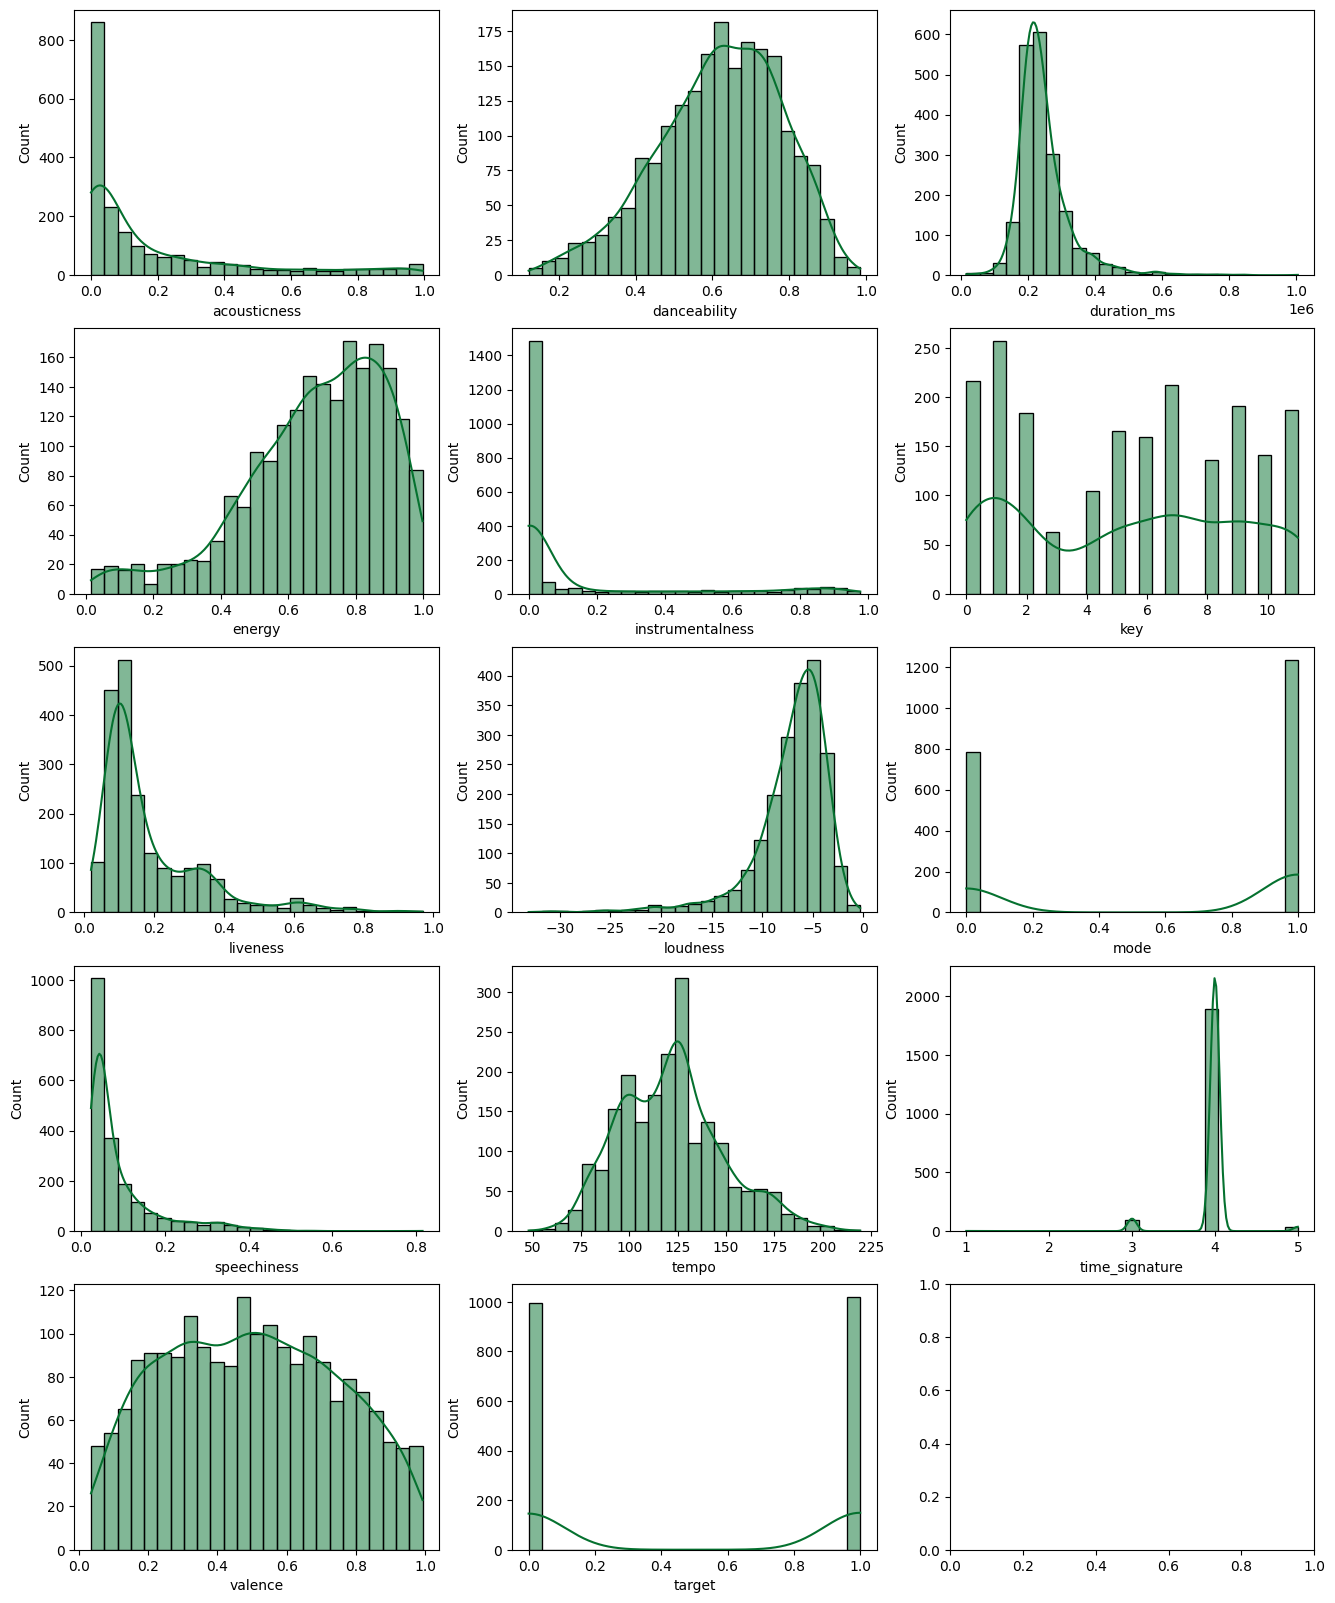

In [18]:
sns.set_palette("Greens_r")
num_cols = data.select_dtypes(include="number").columns
fig, axes = plt.subplots(5,3,figsize=(16,20))
axes = axes.flatten()
ax_no = 0
for col in num_cols:
    sns.histplot(data = data, x=col, bins=25, kde=True, ax = axes[ax_no])
    ax_no += 1
plt.show()

In [19]:
continuous_cols = ['acousticness', 'danceability', 'duration_ms', 'energy',
                   'liveness', 'loudness', 'tempo', 'valence', 'speechiness', 'instrumentalness']
discrete_cols = ['key', 'mode', 'time_signature', 'target']

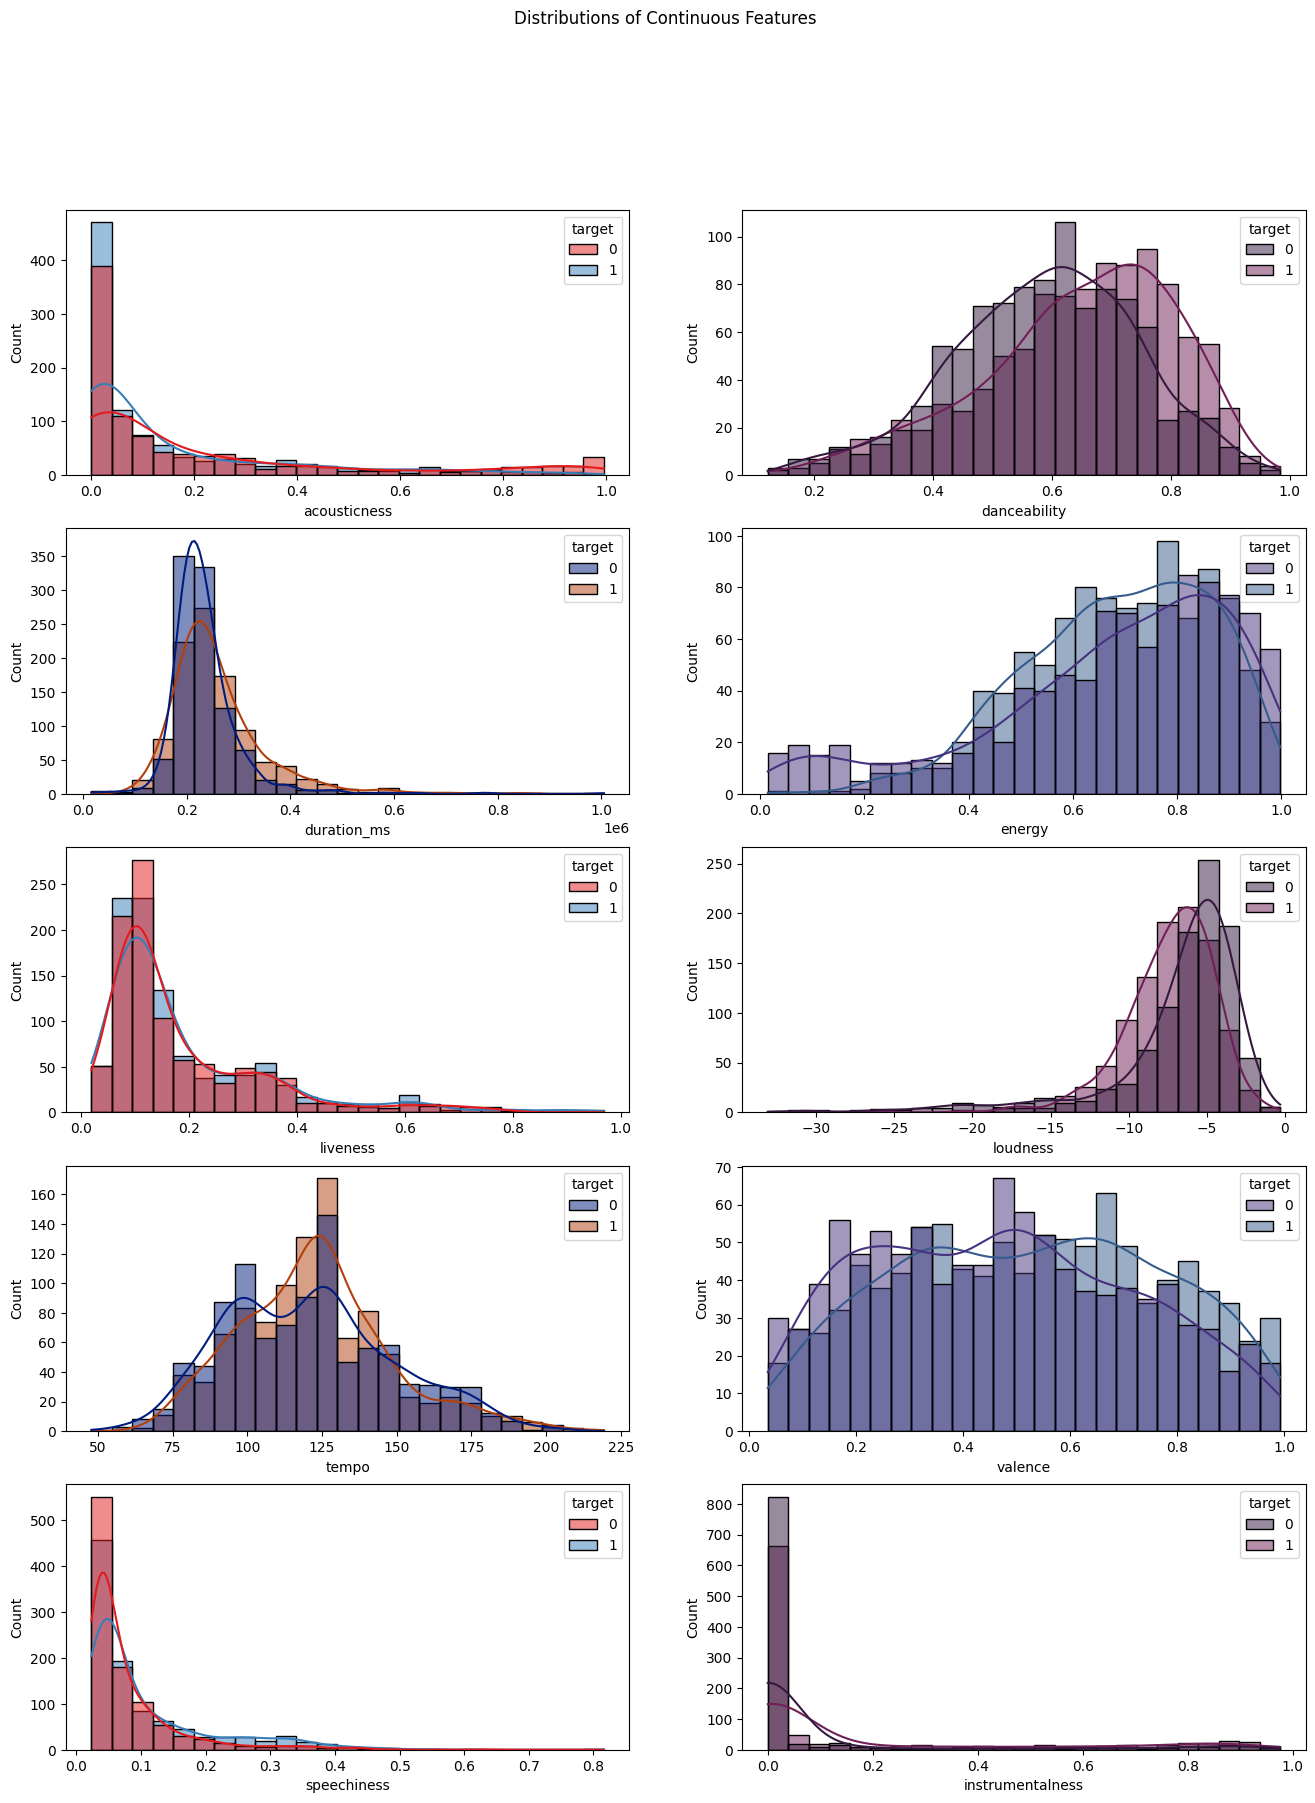

In [20]:
# Examine Continuous Data
fig, axes = plt.subplots(5, 2, figsize=(16, 20))
palettes = ['Set1', 'rocket', 'dark', 'viridis']
axes = axes.flatten()
ax_no = 0
for col in continuous_cols:
    sns.set_palette(palettes[ax_no % 4])
    sns.histplot(data=data, x=col, hue='target', bins=25, kde=True, ax=axes[ax_no])
    ax_no += 1
fig.suptitle('Distributions of Continuous Features')
plt.show()

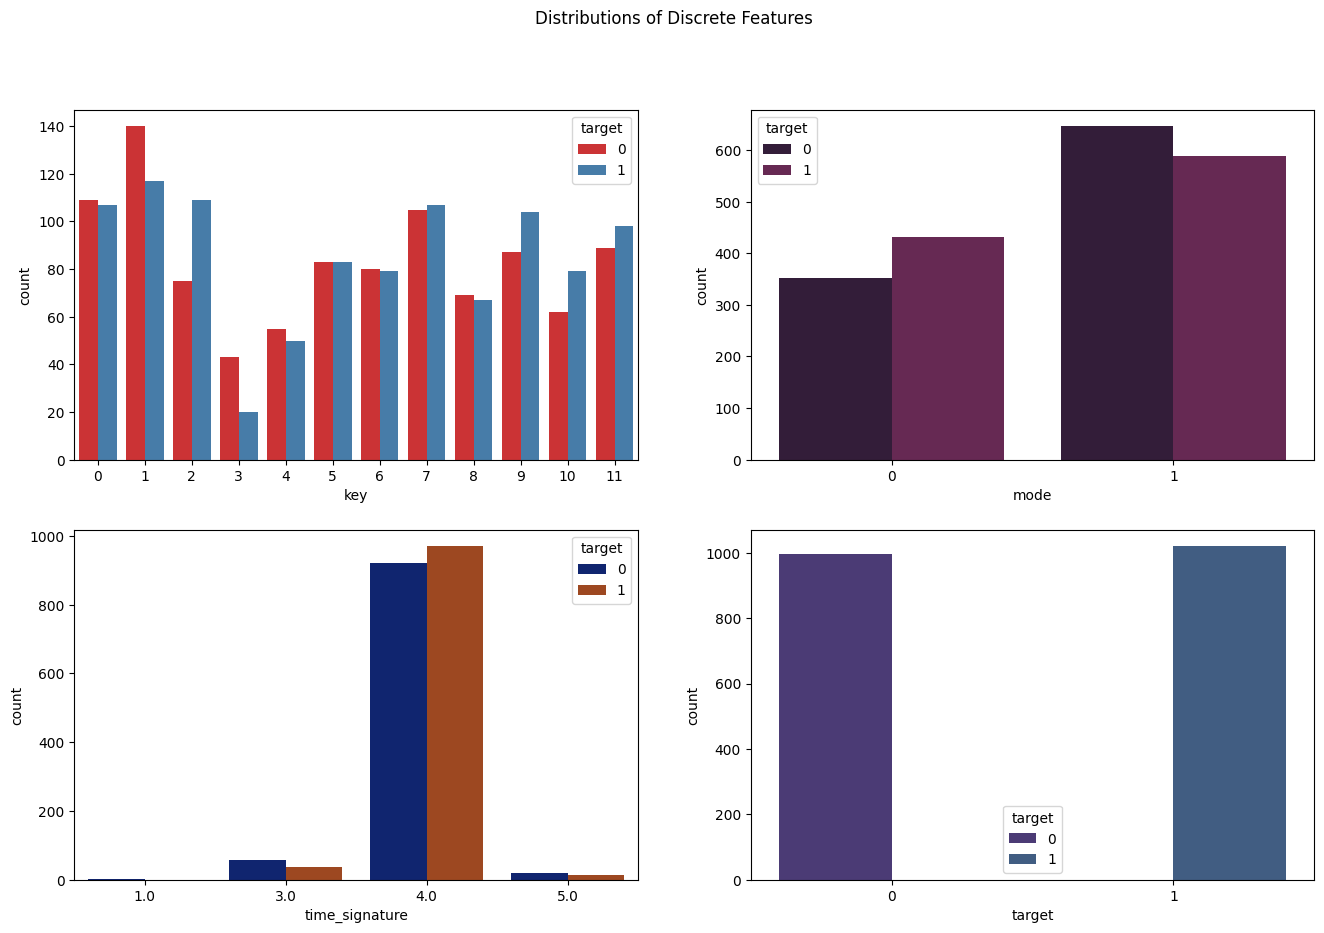

In [21]:
# Examine Descrete Data
fig, axes = plt.subplots(2, 2, figsize=(16, 10))
palettes = ['Set1', 'rocket', 'dark', 'viridis']
axes = axes.flatten()
ax_no = 0
for col in discrete_cols:
    sns.set_palette(palettes[ax_no % 4])
    sns.countplot(data=data, x=col, ax=axes[ax_no], hue='target')
    ax_no += 1
fig.suptitle('Distributions of Discrete Features')
plt.show()

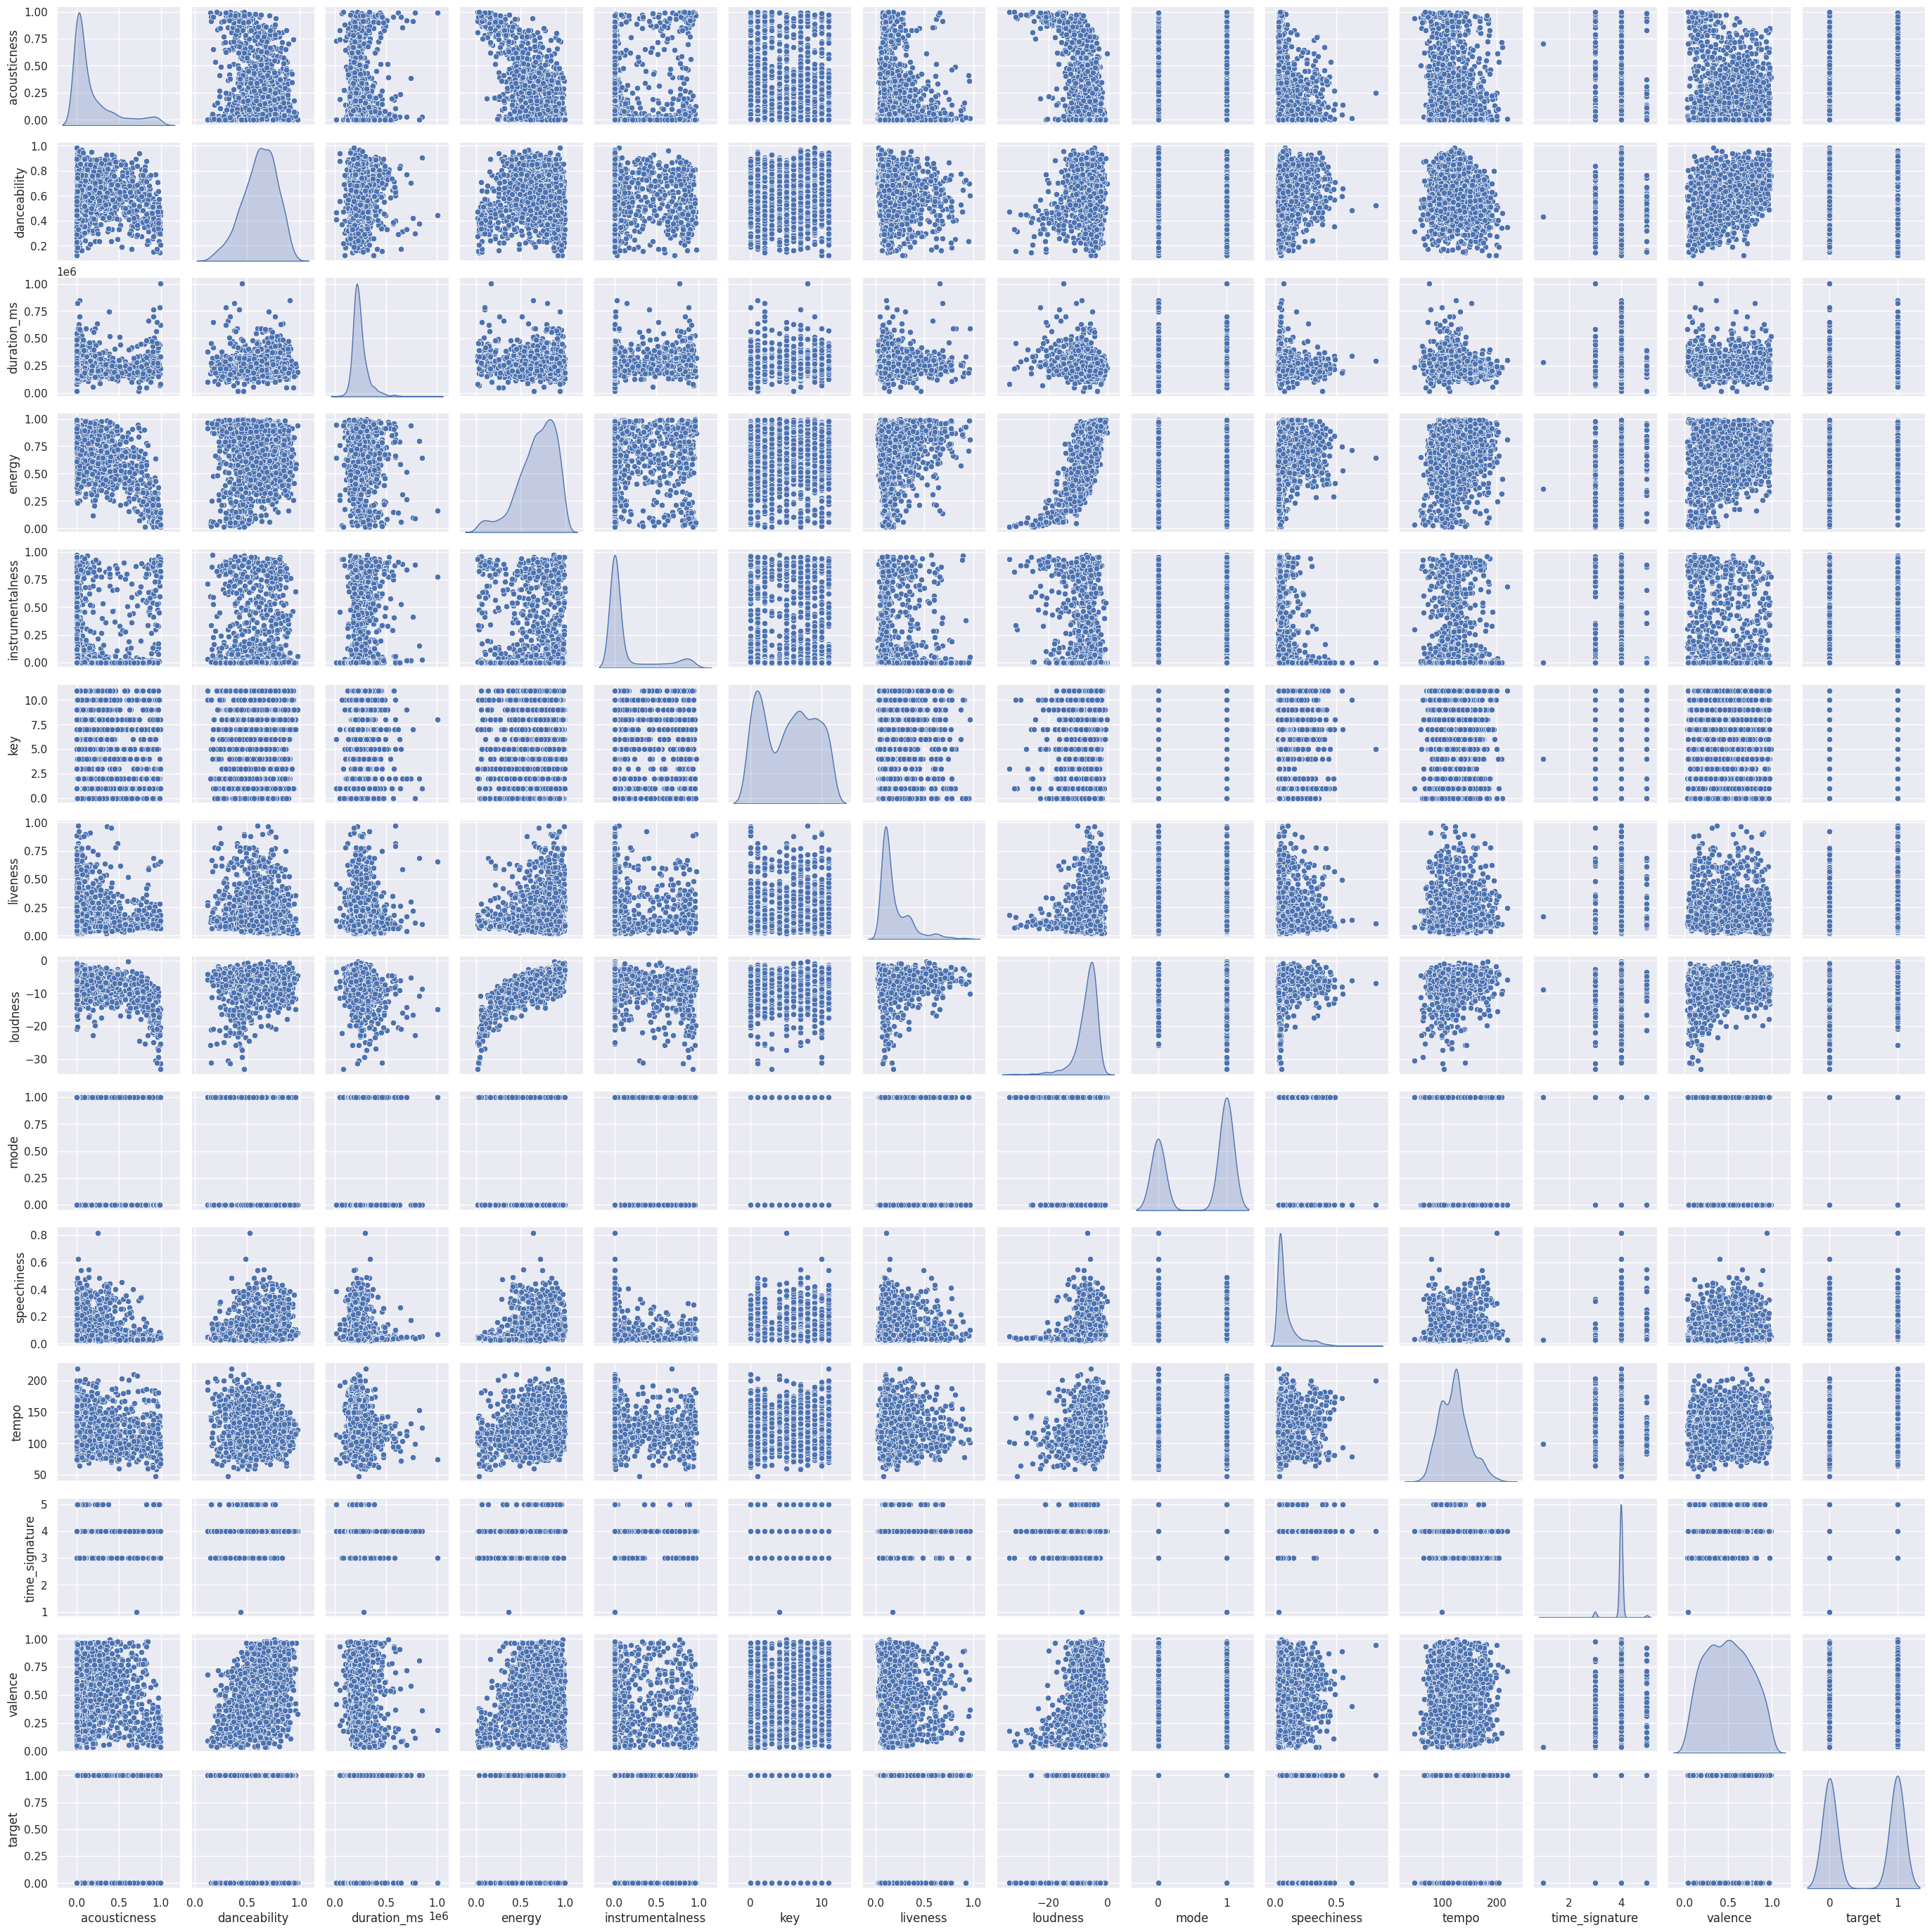

In [22]:
sns.set()
columns = ['acousticness', 'danceability', 'duration_ms', 'energy',
       'instrumentalness', 'key', 'liveness', 'loudness', 'mode',
       'speechiness', 'tempo', 'time_signature', 'valence', 'target']
sns.pairplot(data[columns],size = 2 ,kind ='scatter',diag_kind='kde')
plt.show()